Import the tidyverse.

In [1]:
library('tidyverse')
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Bars

Let's use the "diamonds" data set. Preview the first five rows of the diamonds dataset using the `head` function.  
(*Hint: try* `?head` *to get the help page for the* `head` *function*)

In [2]:
diamonds |> head(5)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


In [3]:
diamonds |> dim()

# nubmer of rows x number of columns

[1] 53940    10

Make a bar chart of the "cut" column. About how many rows are there for the cut category "Ideal"?

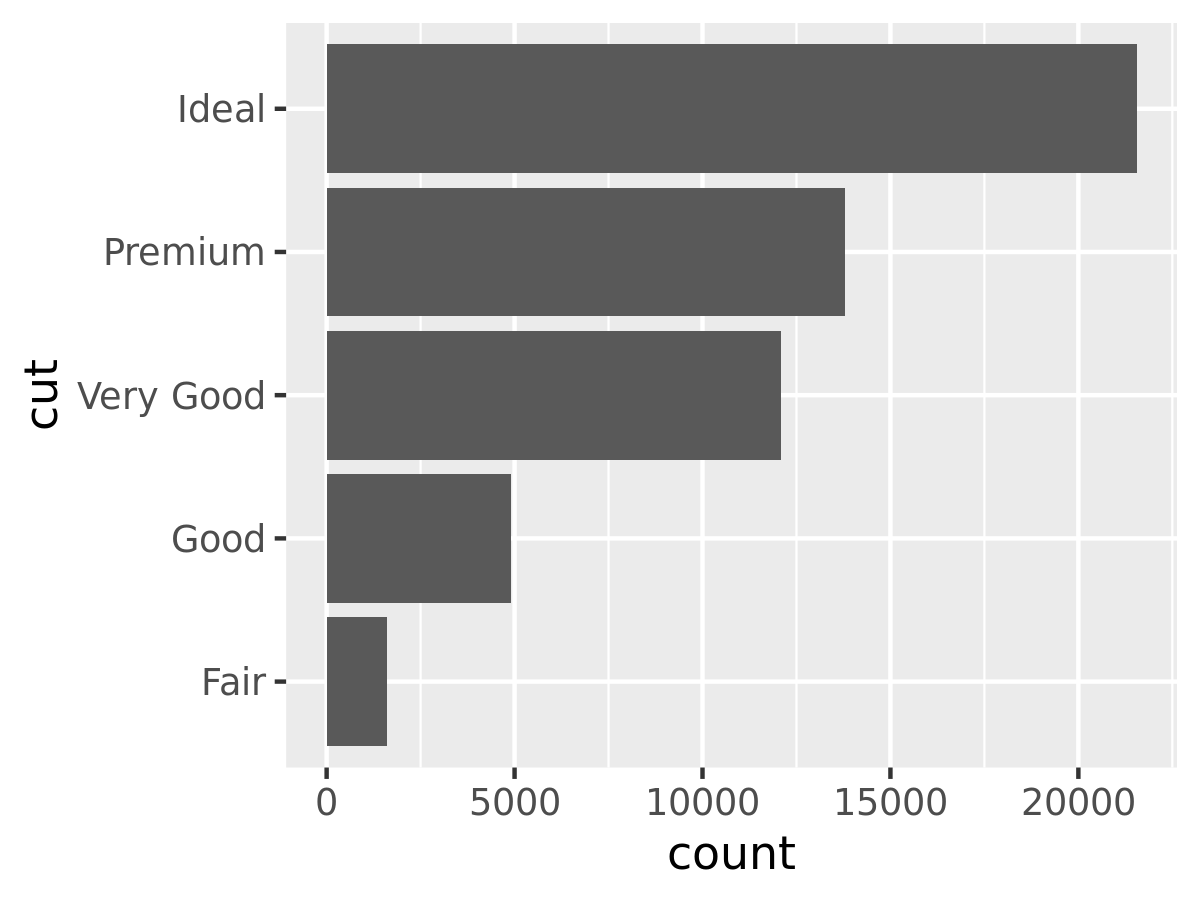

In [4]:
p = ggplot(diamonds, aes(y = cut)) +
    geom_bar()

p

In [5]:
diamonds %>%
group_by(cut) %>%
count()

cut,n
<ord>,<int>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


Use `coord_flip` to rotate the chart by 90 degrees. 

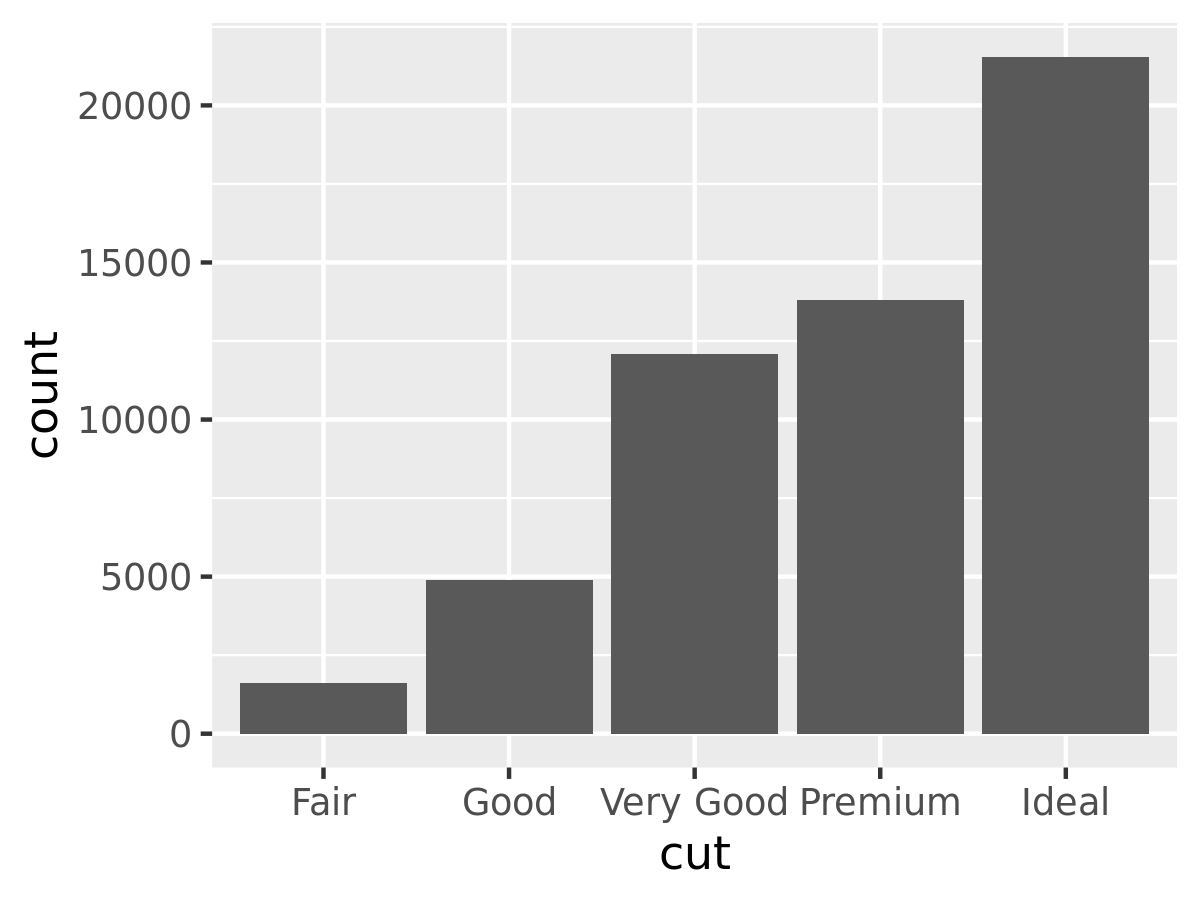

In [6]:
p2 = p + coord_flip()

p2

# Lines

We'll use flight data from the Bureau of Transportation Statistics
https://www.transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&Link=0

In [12]:
flight.data = read_csv('https://www.openintro.org/book/statdata/nycflights.csv') |>
    group_by(month, carrier, year) %>%
    summarize(N_flights = n()) %>%
    filter(carrier %in% c('UA', 'AA', 'US'))

flight.data |> head()

Rows: 32735 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): carrier, tailnum, origin, dest
dbl (12): year, month, day, dep_time, dep_delay, arr_time, arr_delay, flight...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'month', 'carrier'. You can override using
the `.groups` argument.


month,carrier,year,N_flights
<dbl>,<chr>,<dbl>,<int>
1,AA,2013,270
1,UA,2013,459
1,US,2013,163
2,AA,2013,232
2,UA,2013,403
2,US,2013,136


What are the columns in `flight.data`? (*Hint: preview the table*)

In [13]:
flight.data |> head()

month,carrier,year,N_flights
<dbl>,<chr>,<dbl>,<int>
1,AA,2013,270
1,UA,2013,459
1,US,2013,163
2,AA,2013,232
2,UA,2013,403
2,US,2013,136


First, make a bar chart of the `carrier` column? Does this make sense?

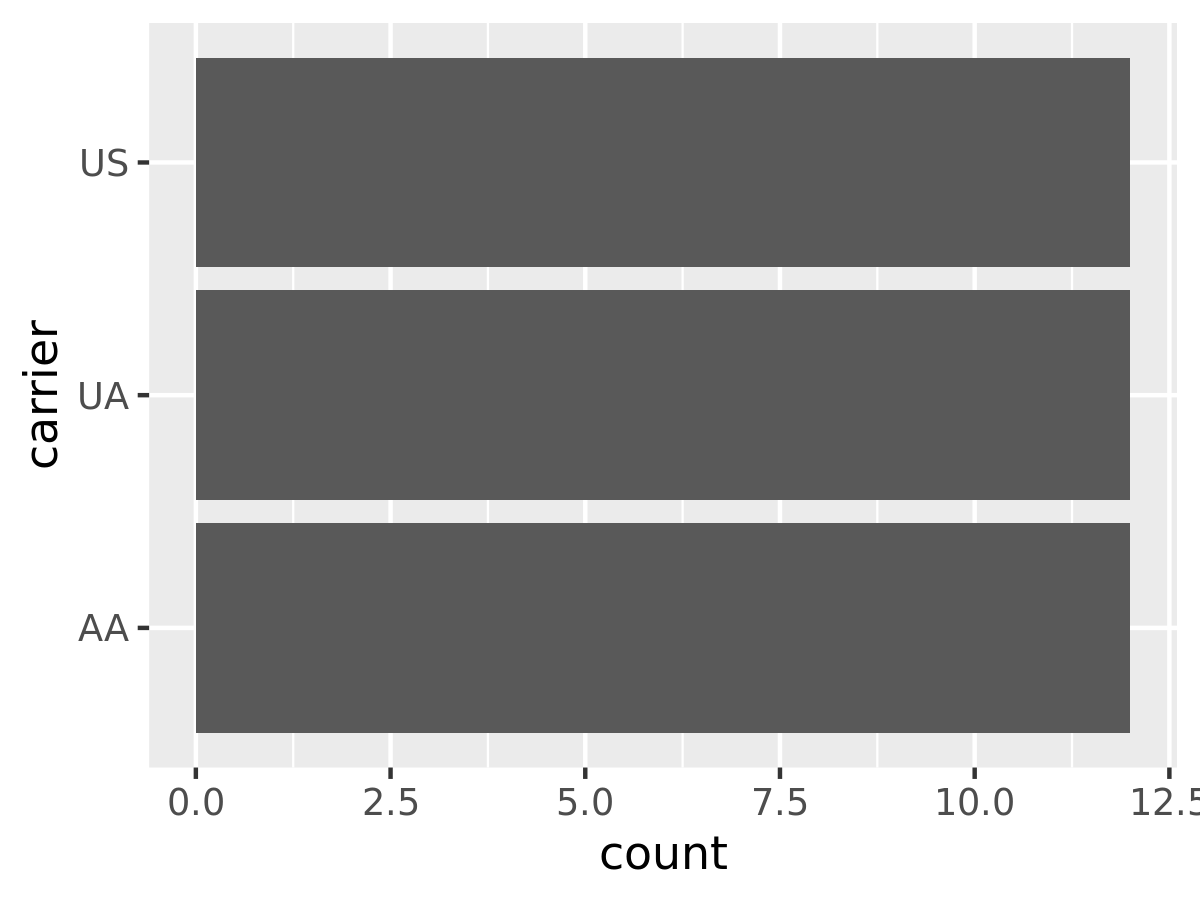

In [14]:
p3 = ggplot(flight.data, aes(y = carrier)) +
    geom_bar()

p3

Plot month versus number of flights grouped according to carrier.

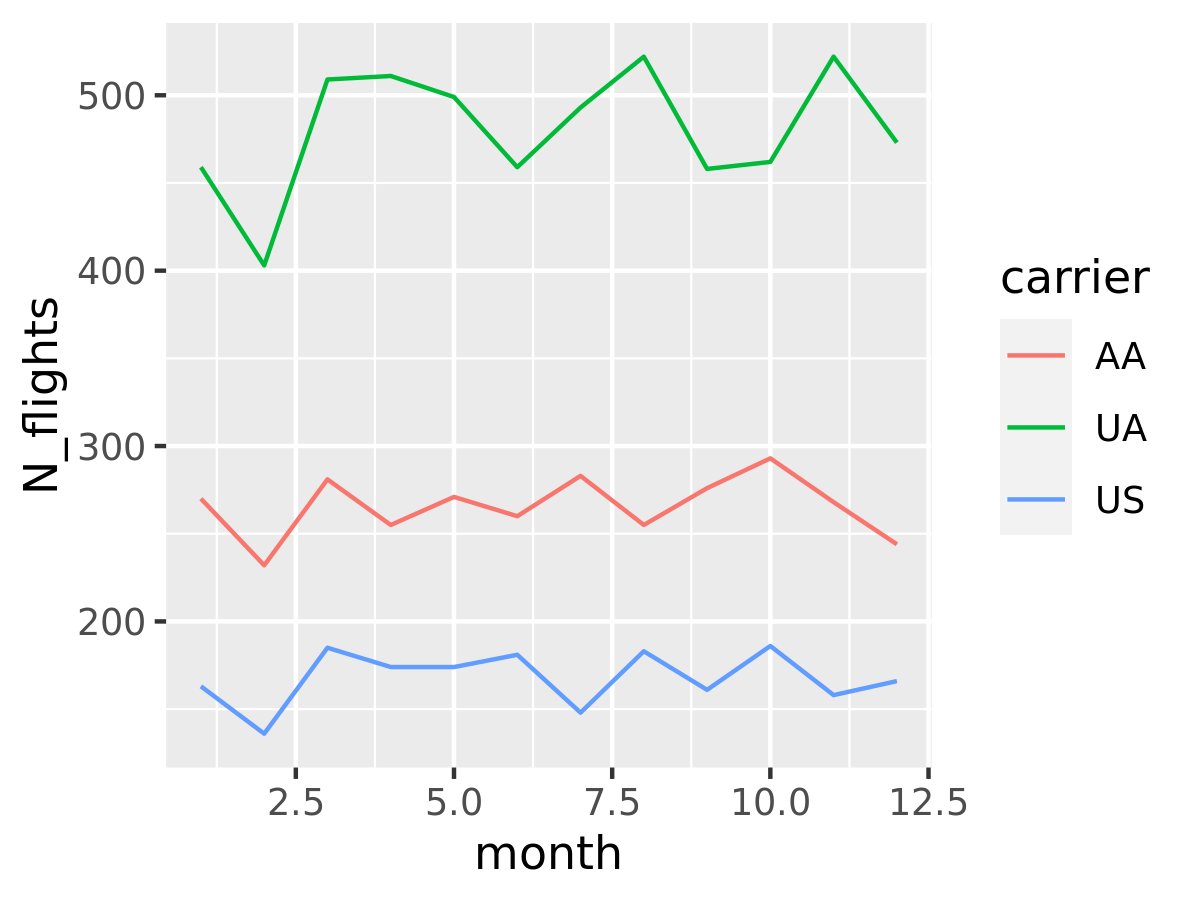

In [15]:
p4 = ggplot(flight.data, aes(x = month, y = N_flights, color = carrier)) +
    geom_line()

p4

# Smooth

Plot a scatter plot (`geom_point`) of carat versus price with the diamonds dataset.

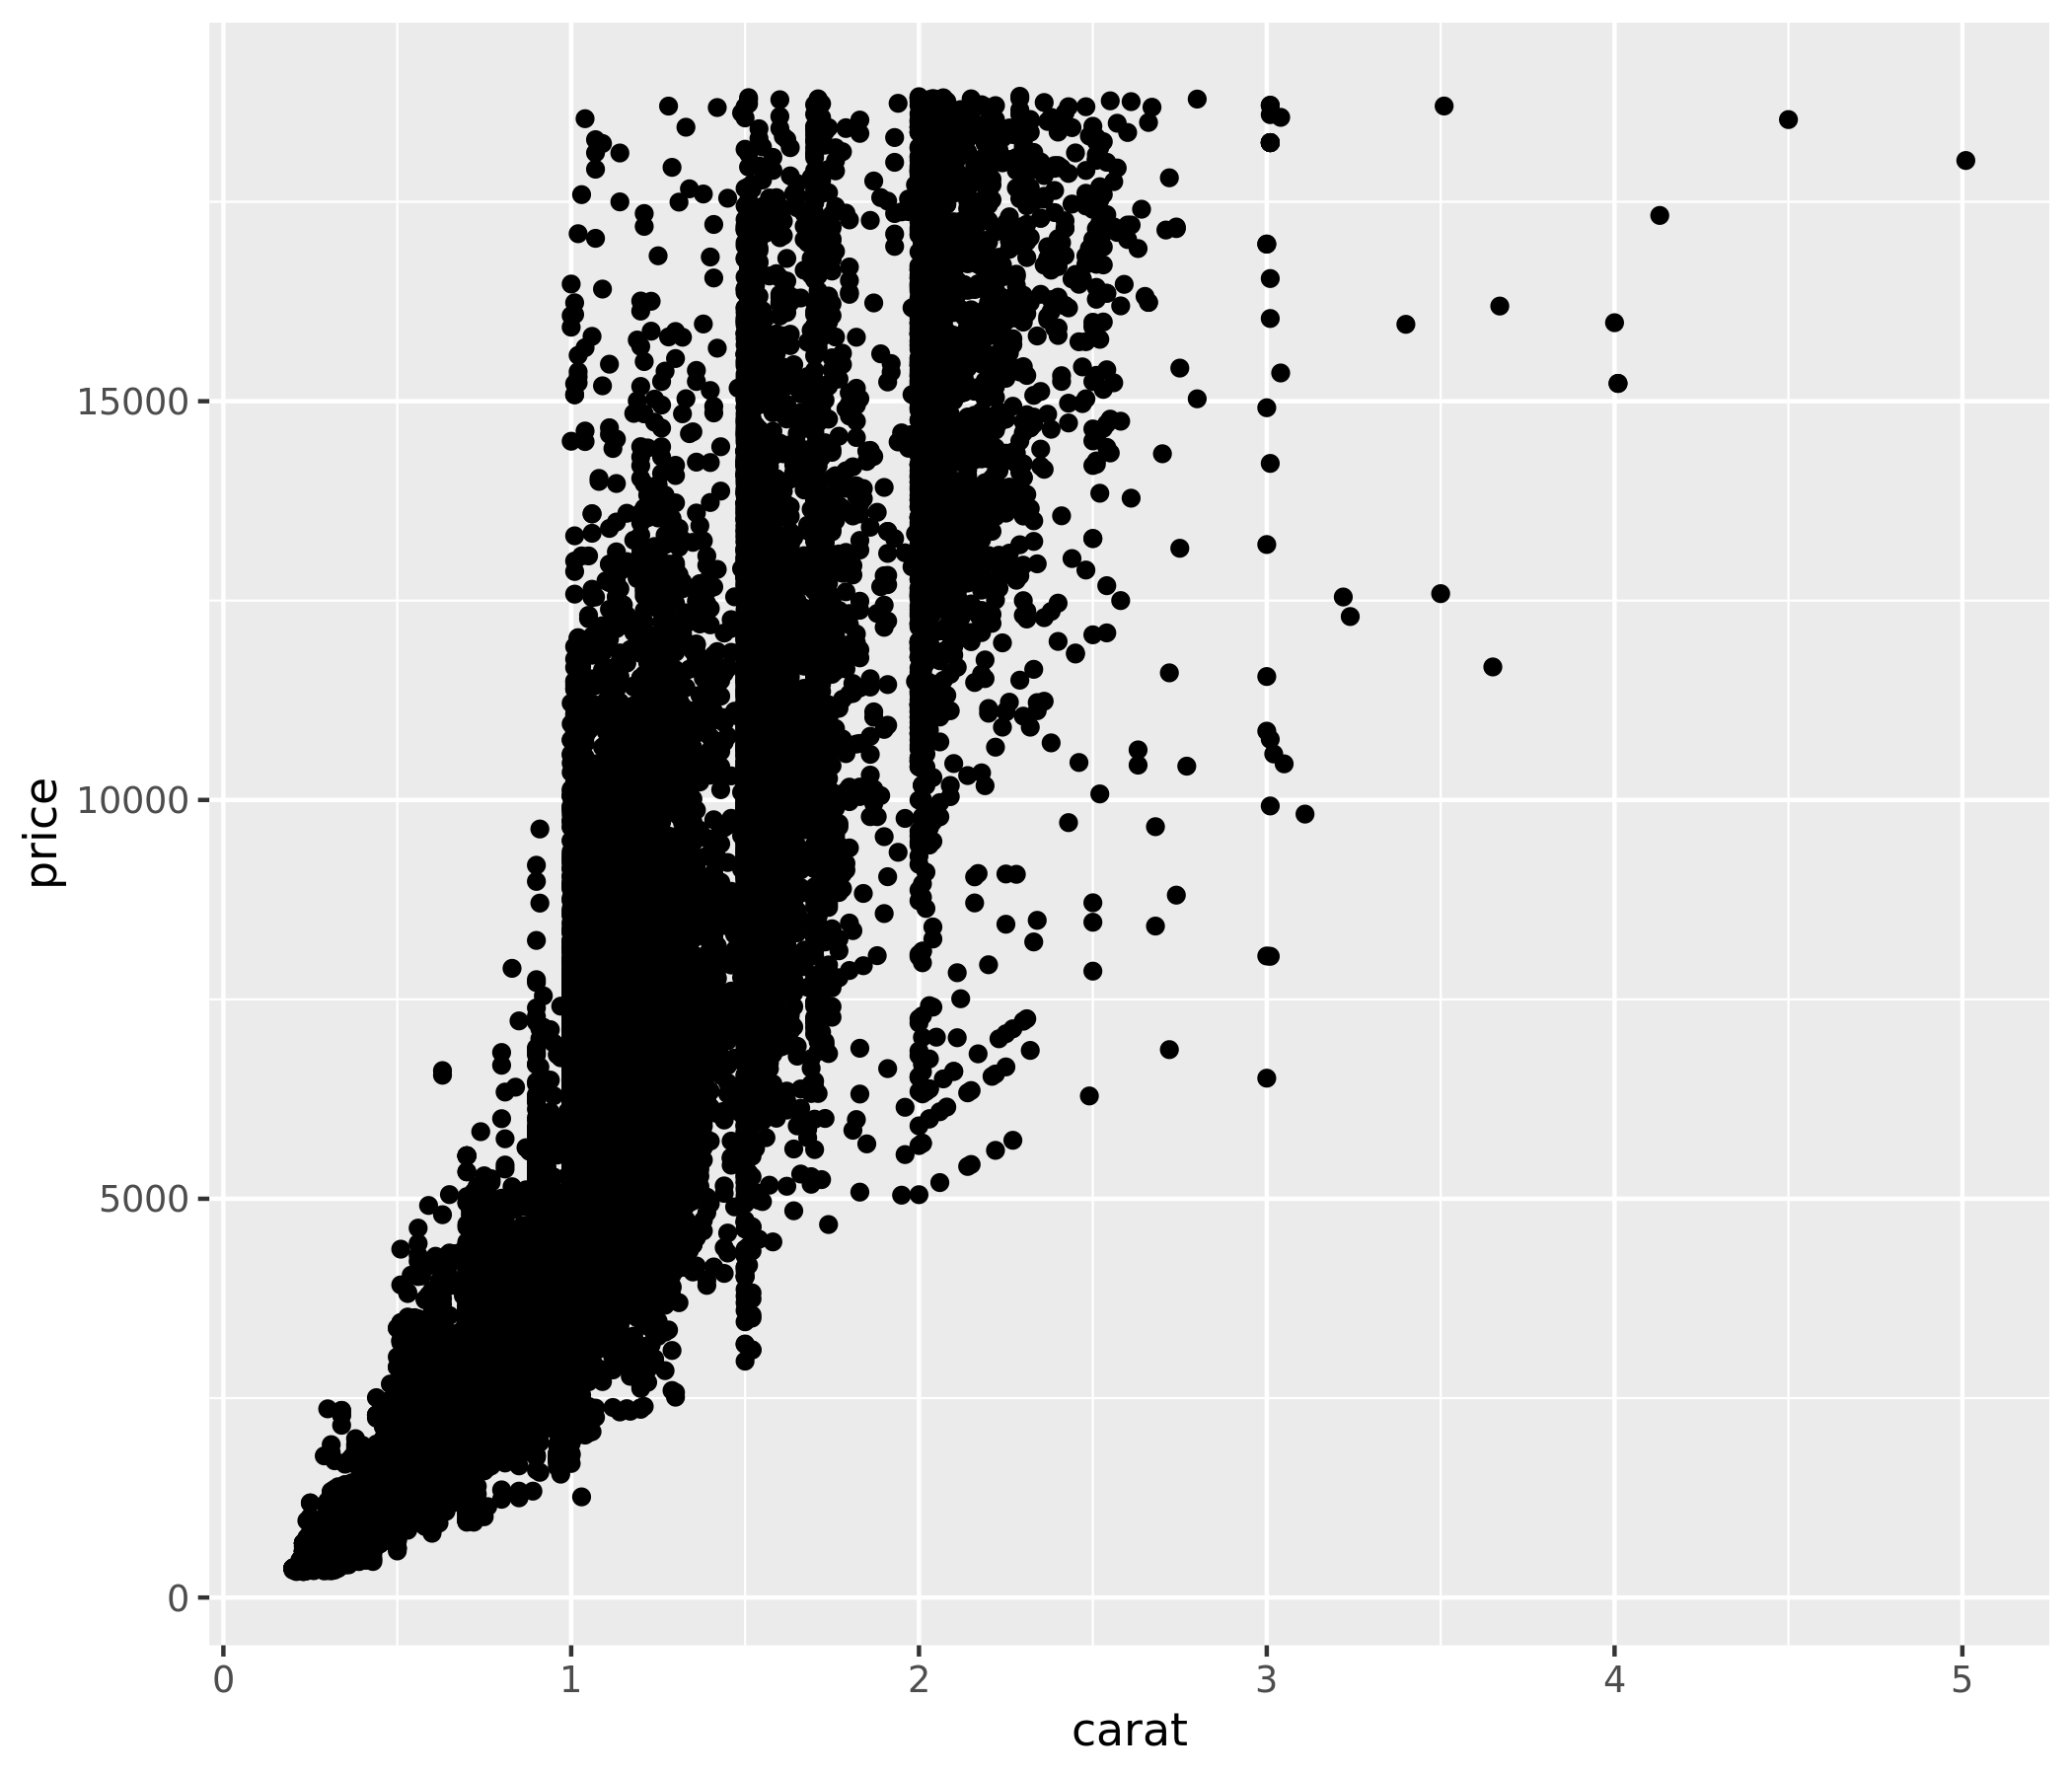

In [16]:
options(repr.plot.width=7, repr.plot.height=6)

p5 = ggplot(diamonds, aes(y = price, x = carat)) +
    geom_point()

p5

There is a lot of overplotting in this figure. Make the same plot but use the `alpha` value to reduce
the opacity of the points.  
(*Hint: alpha values can be set from 0 (transparent) to 1 (opaque)*)

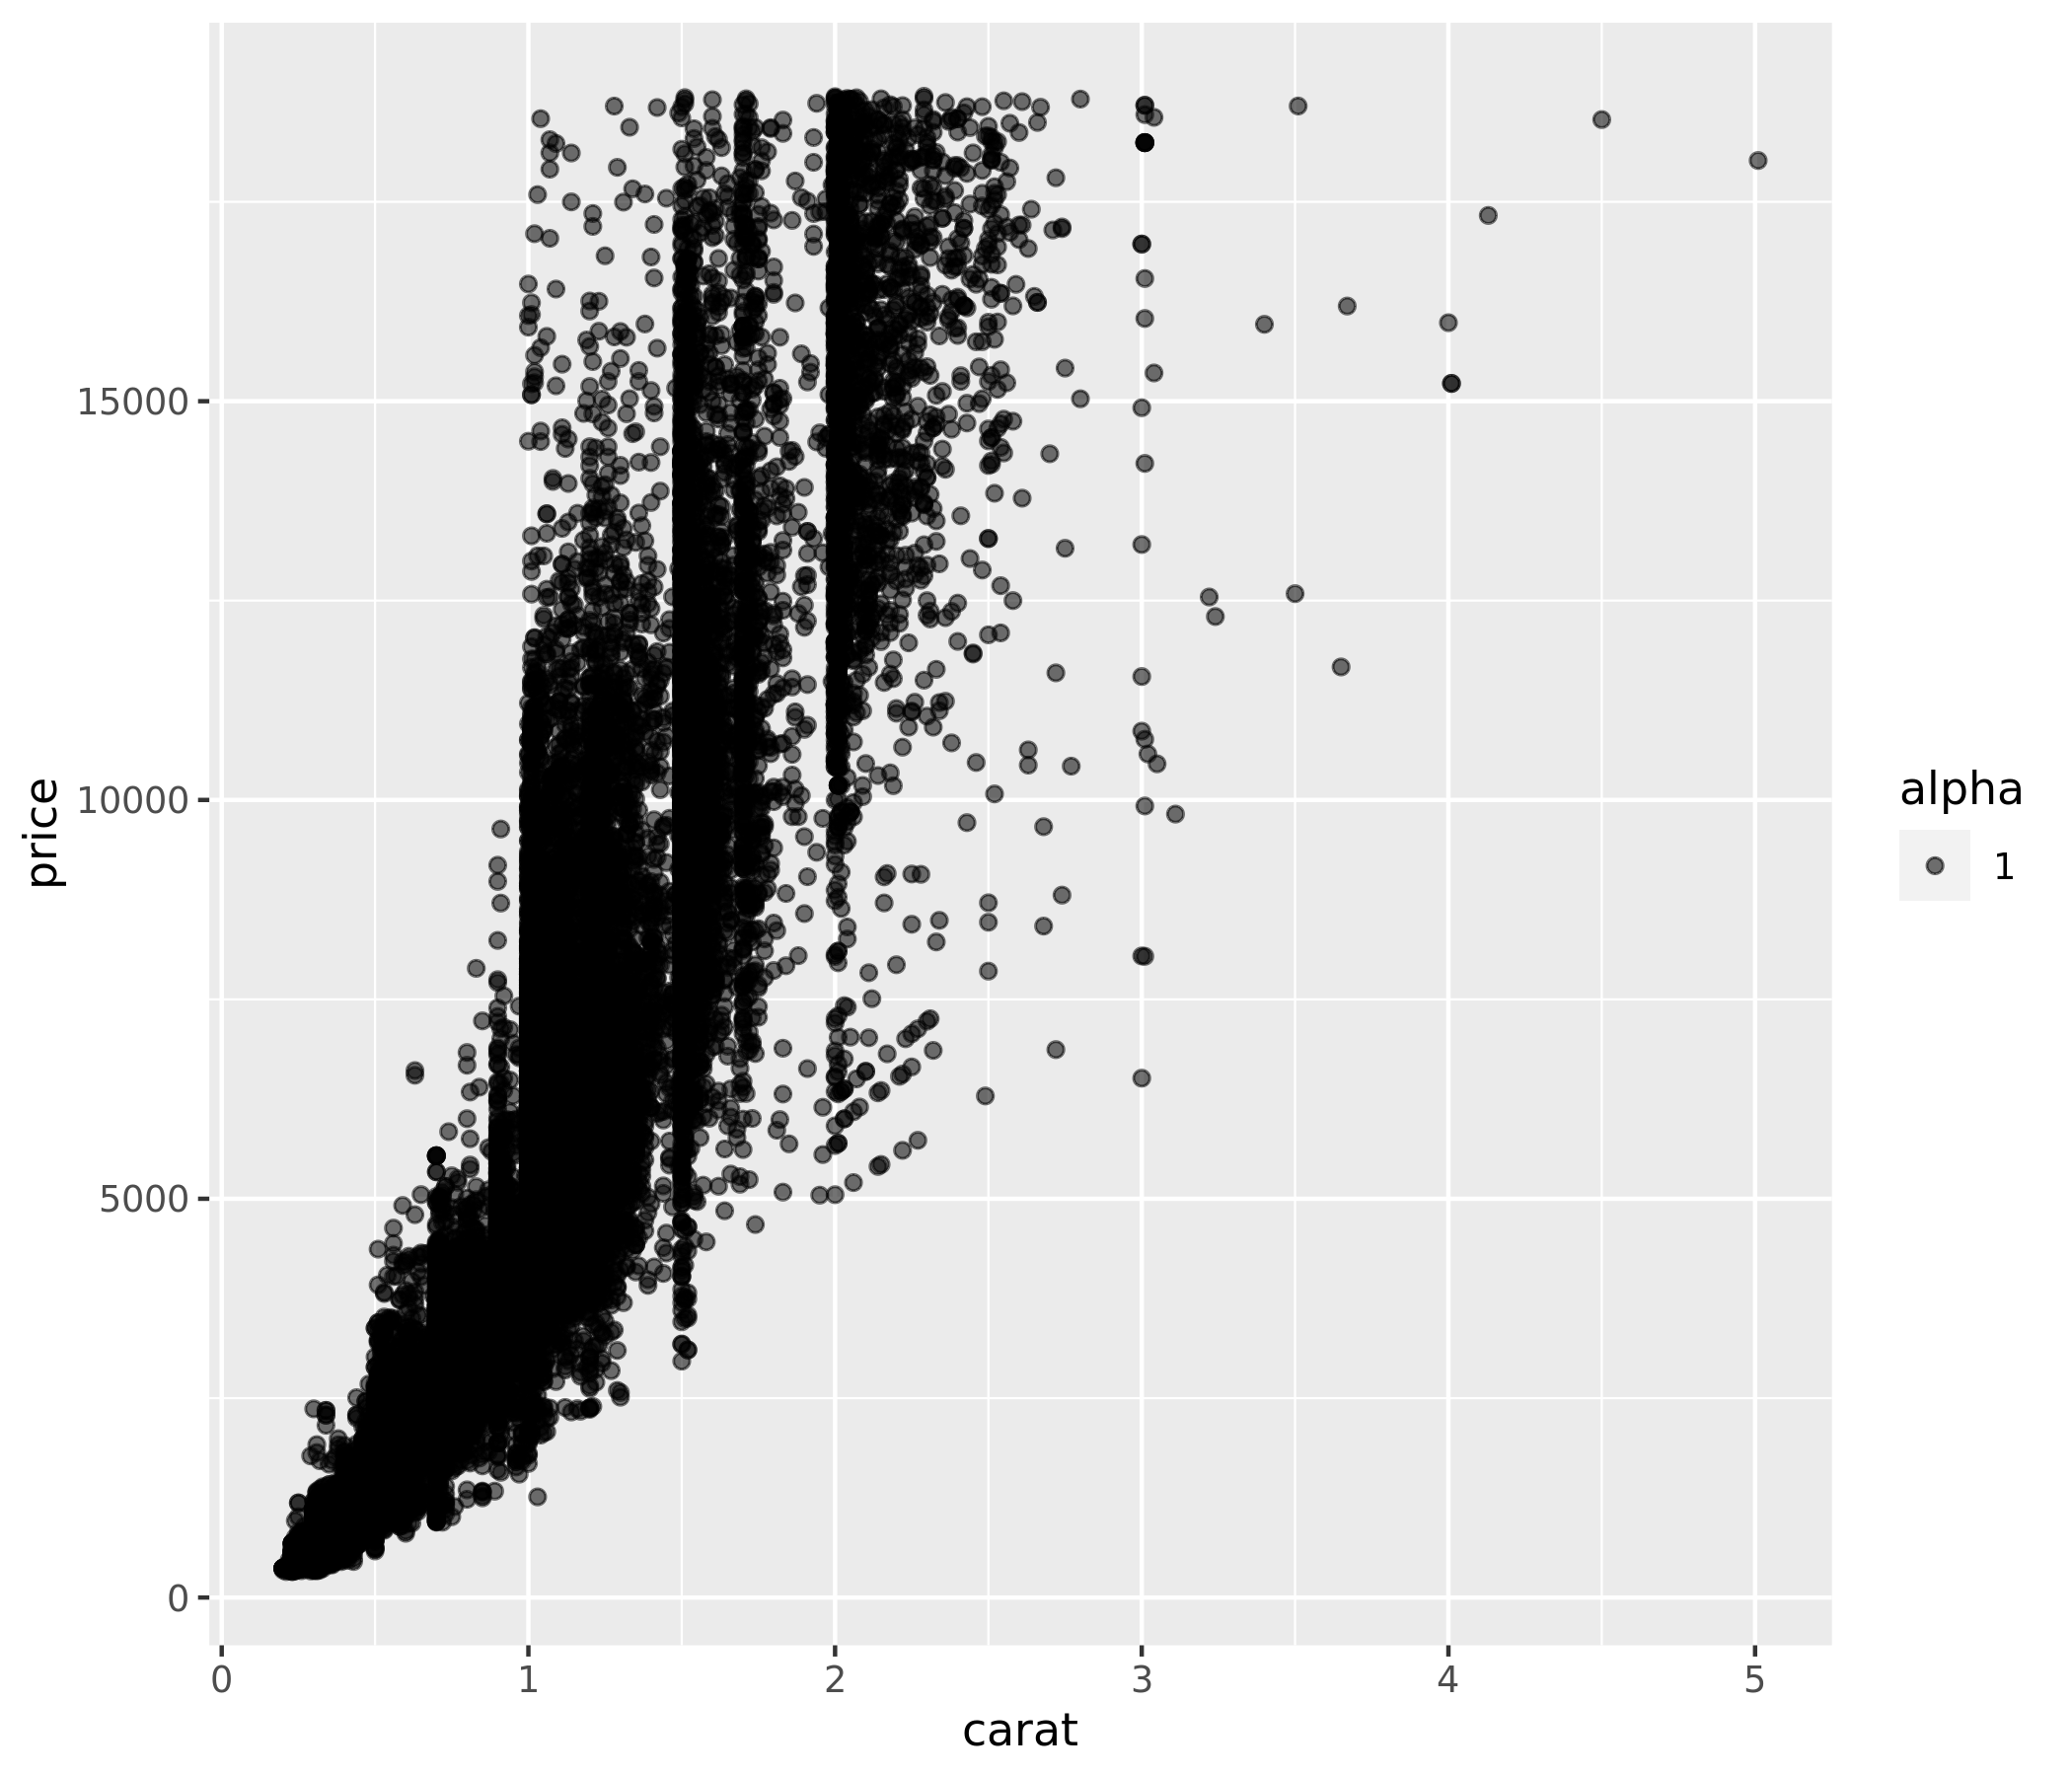

In [17]:
p6 = ggplot(diamonds, aes(y = price, x = carat, alpha = 1)) +
    geom_point()

p6

Facetting can also help with overplotting. Facet the chart by `cut`.

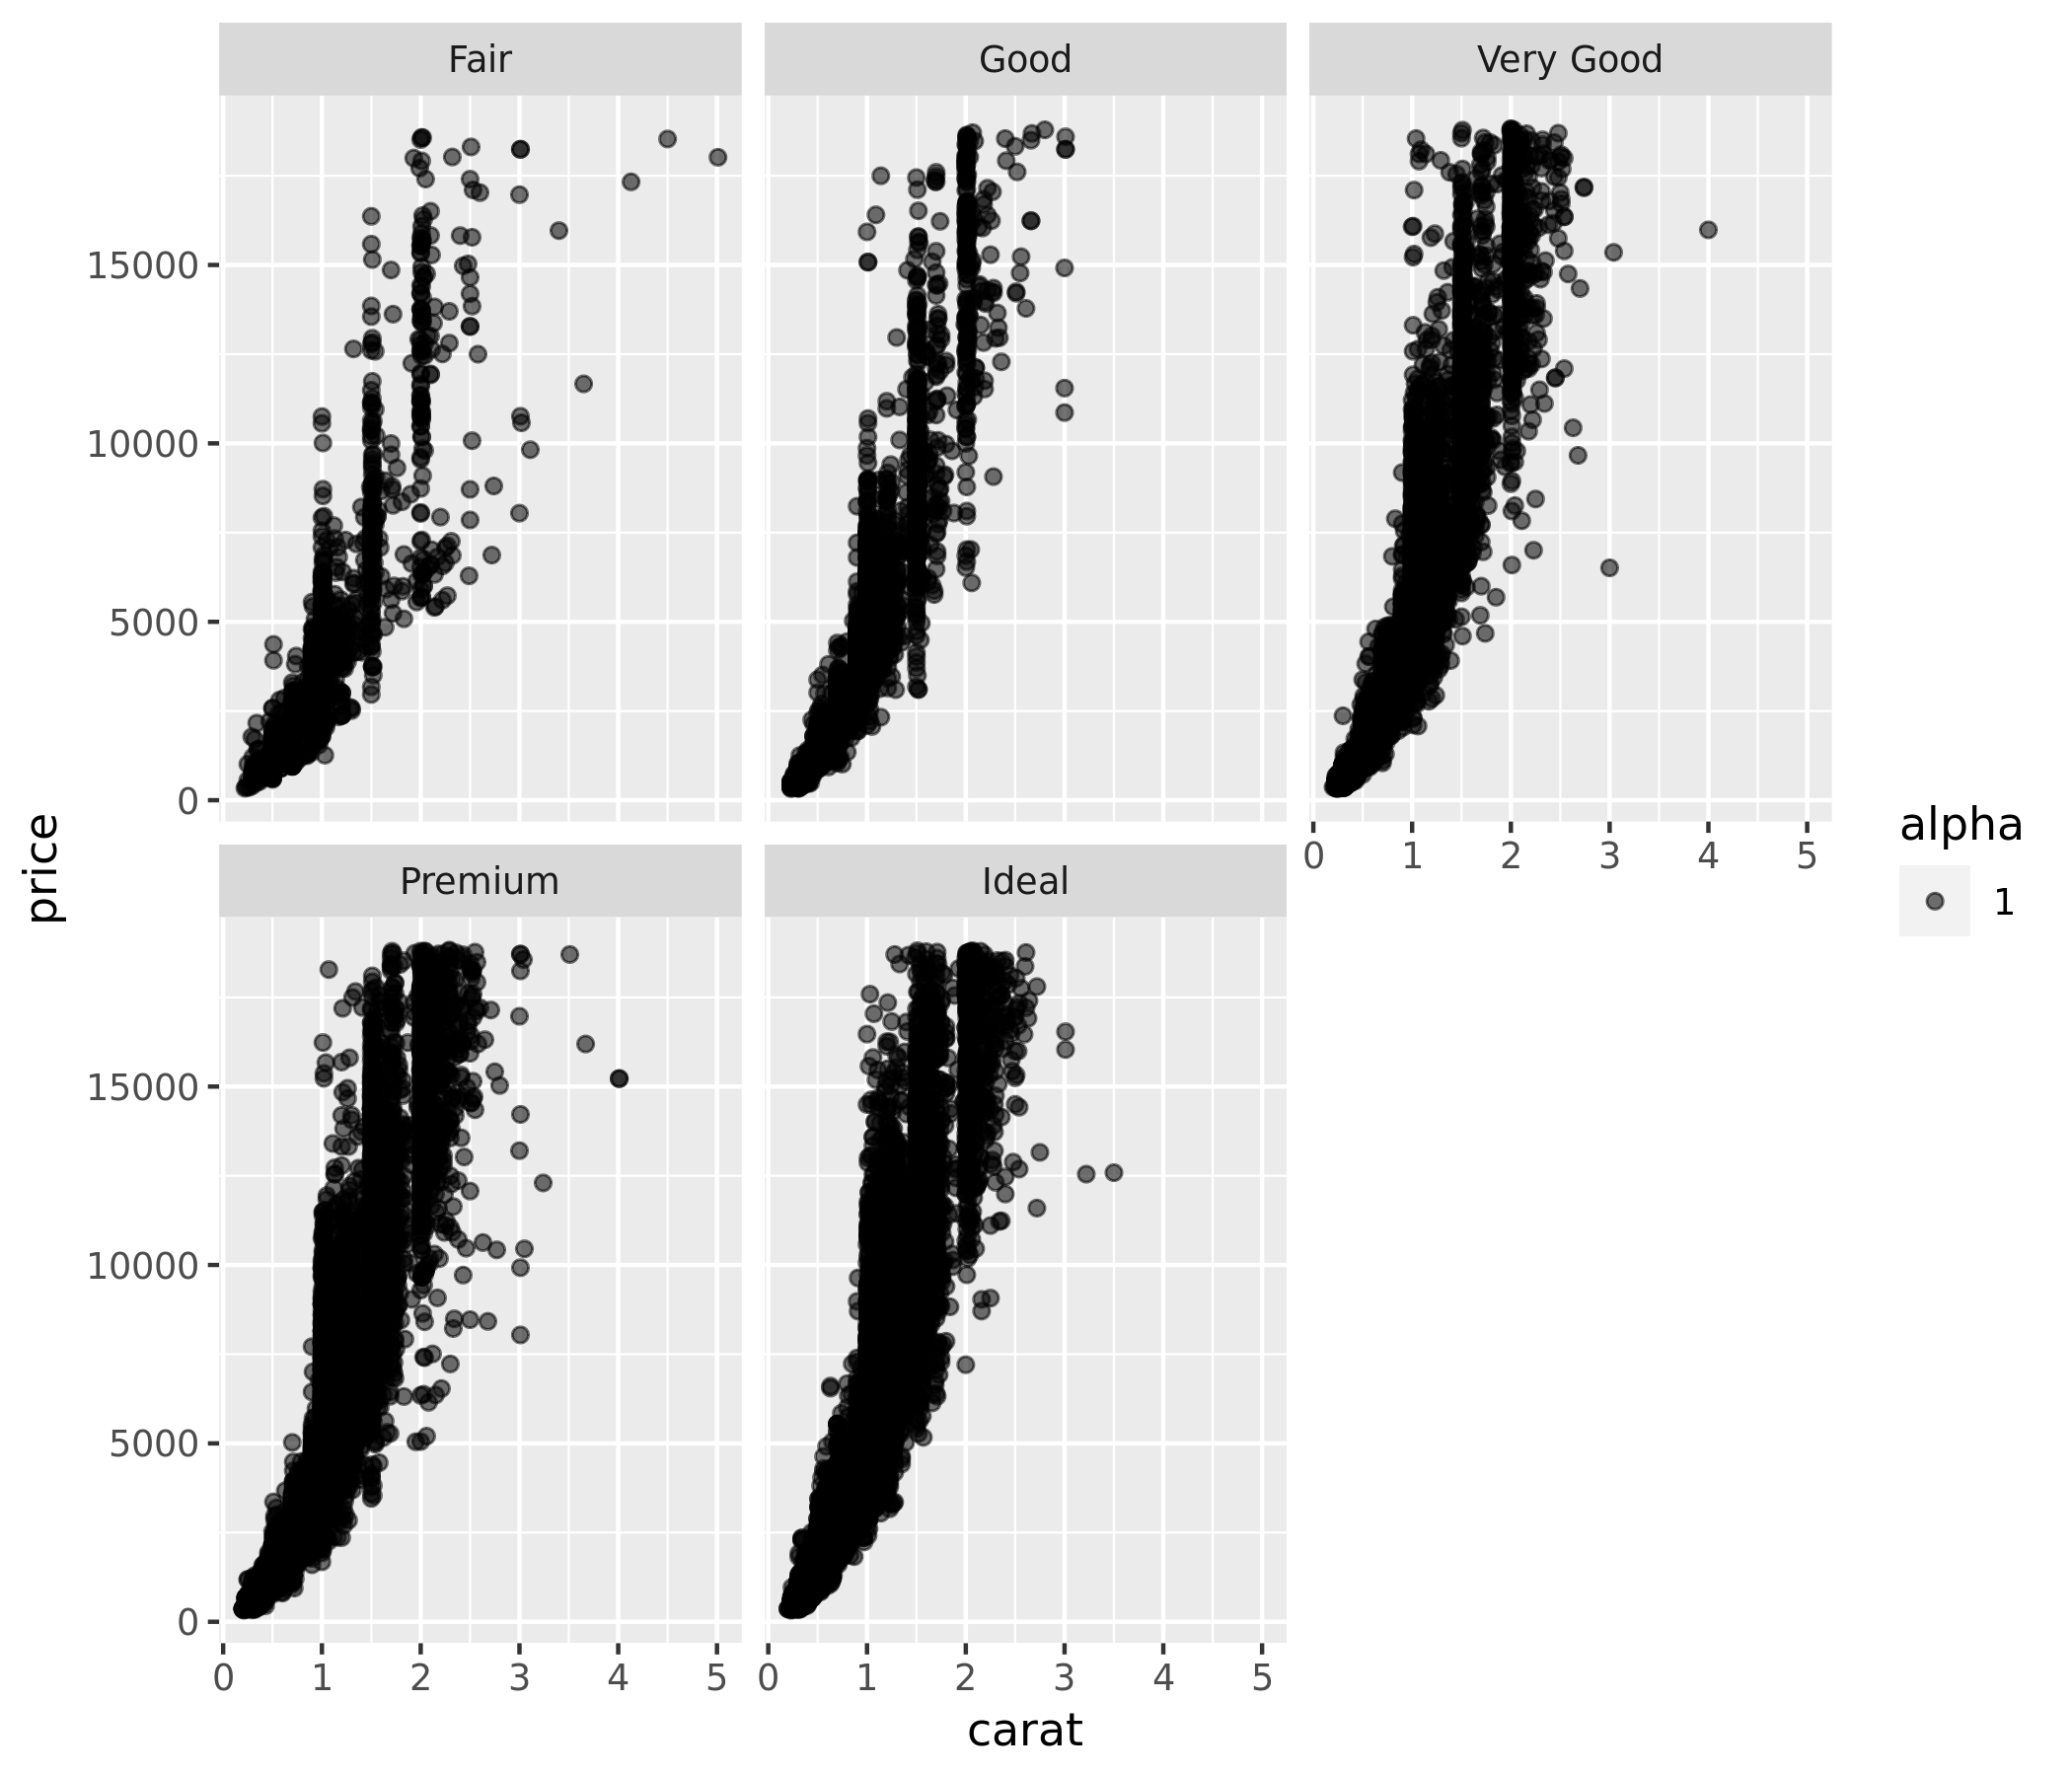

In [21]:
p7 = p6 + facet_wrap(~cut)

p7

Add a `geom_smooth` to your facetted plot to emphasize the trend in the data.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


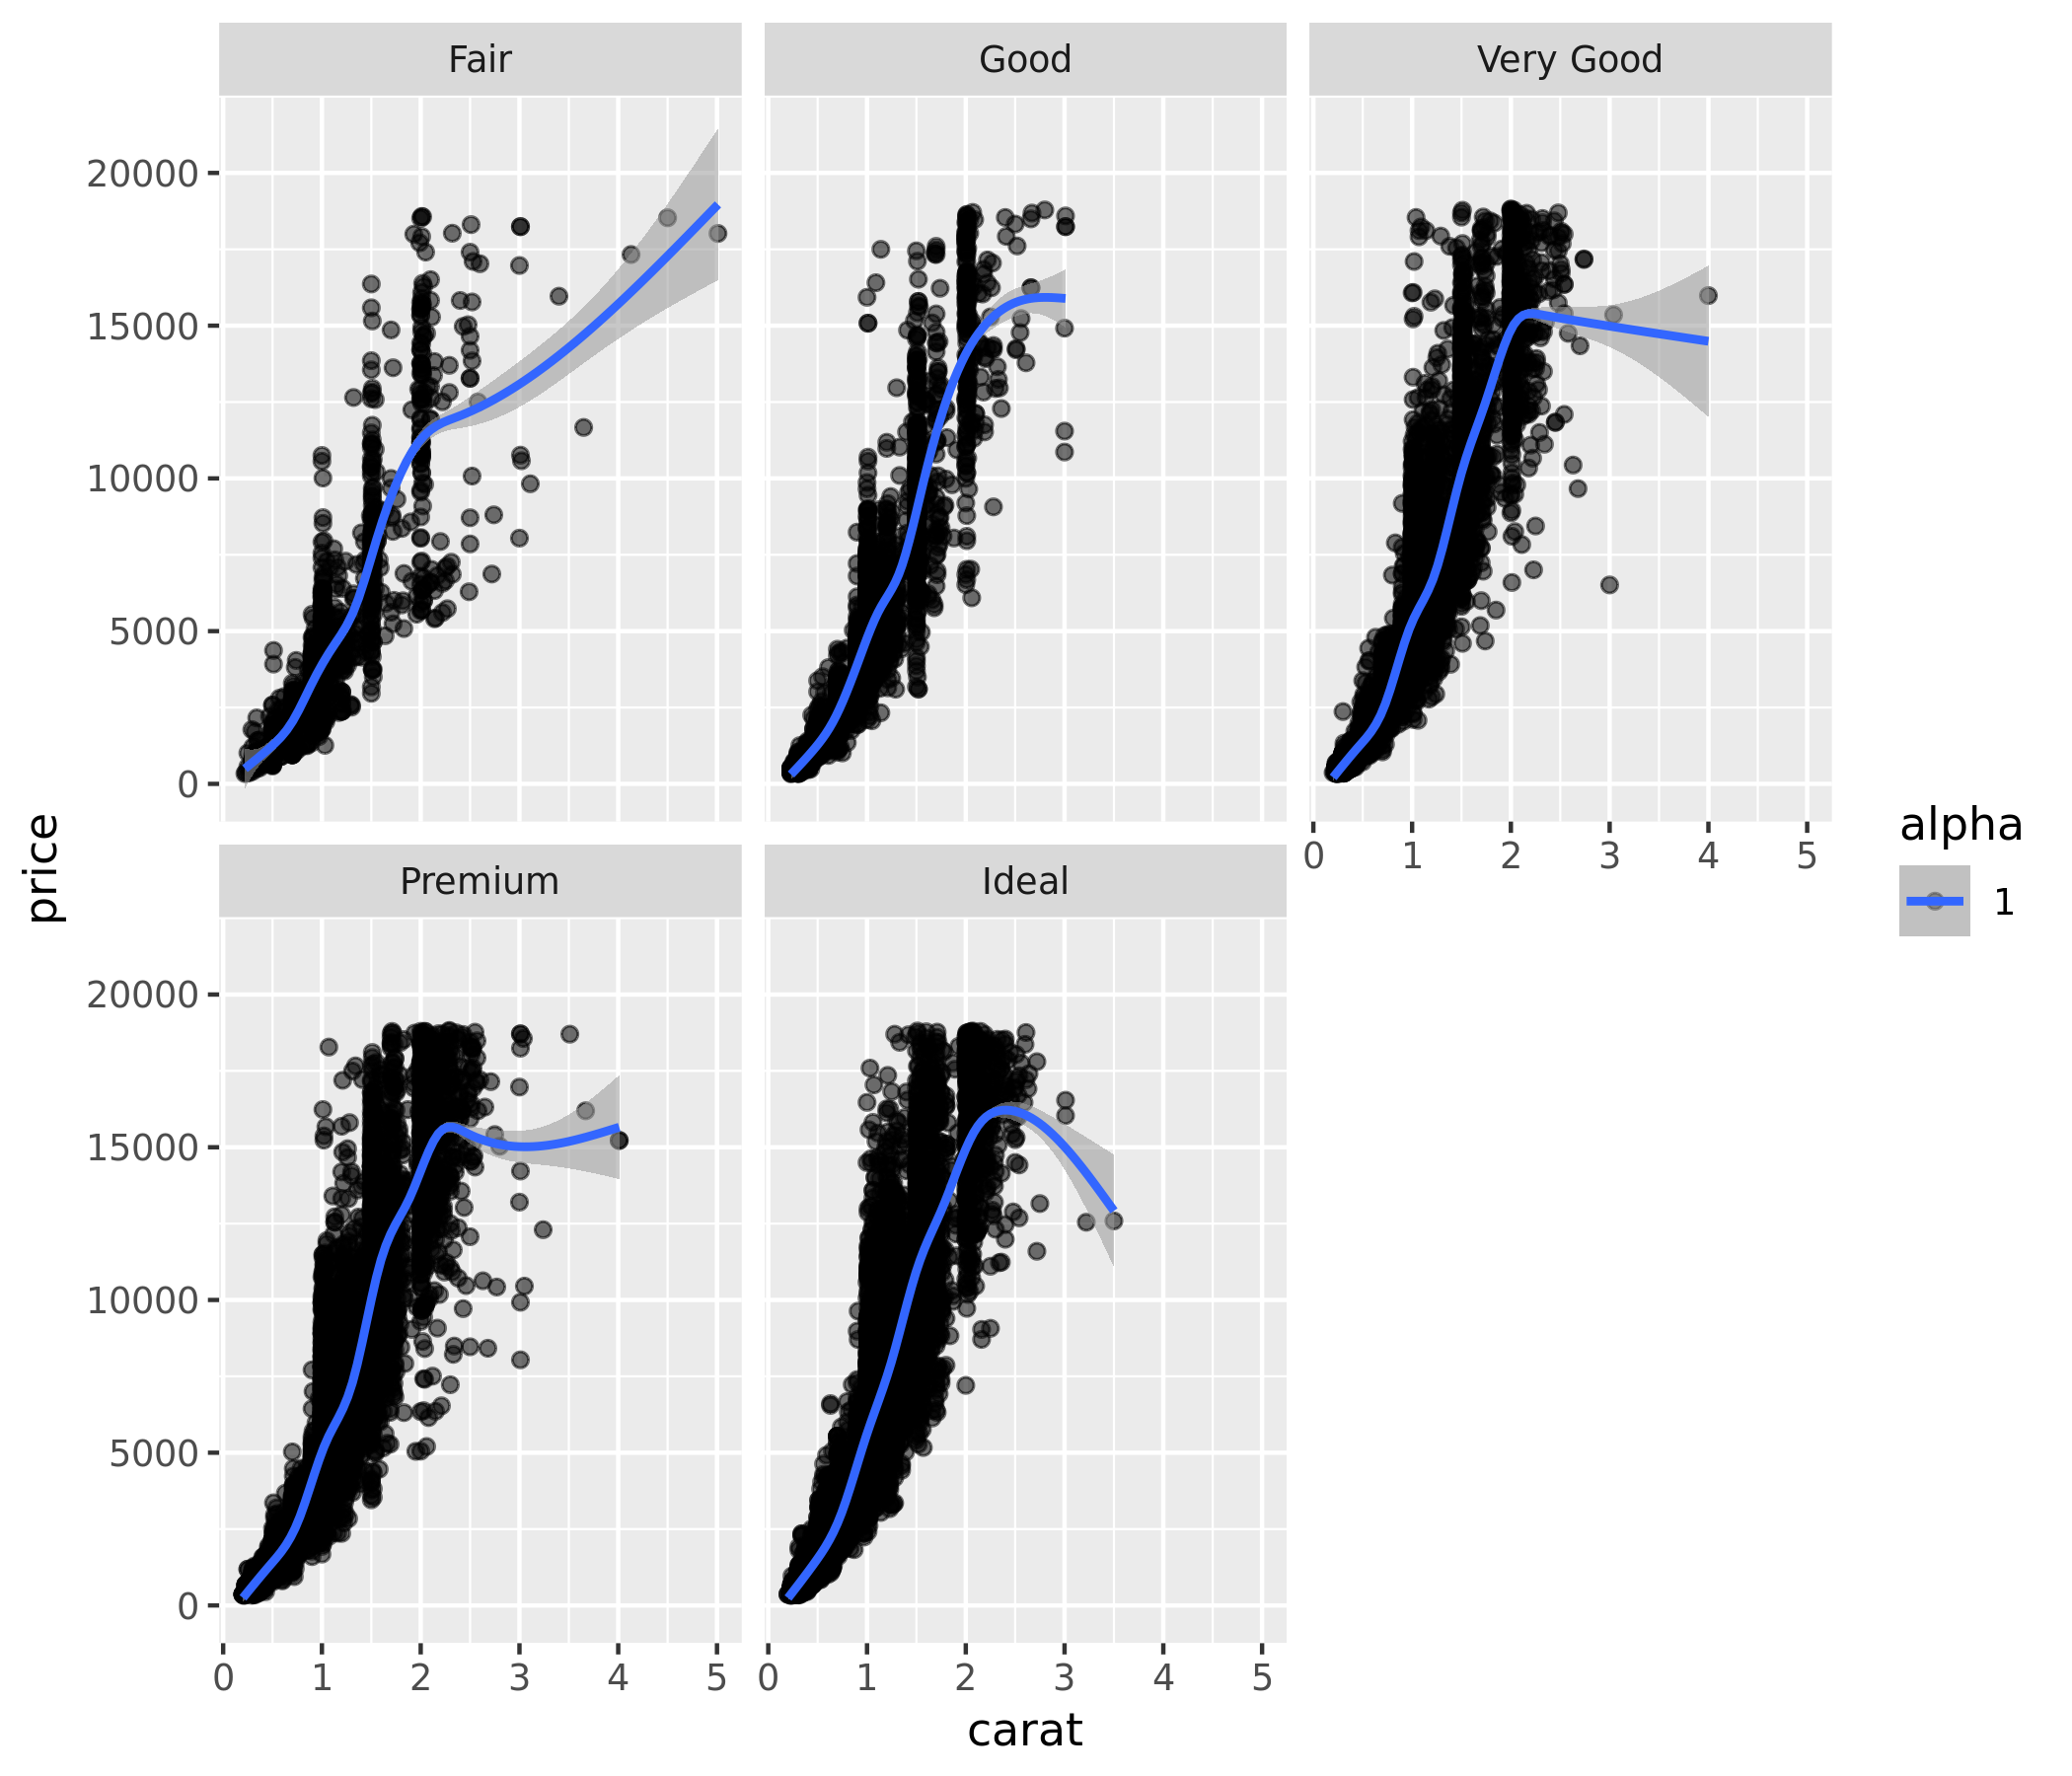

In [19]:
p8 = p7 + geom_smooth()

p8